# Lecture 2: Data Foundation & ML Framework

##Interactive Demo Notebook

---
In this notebook, we’ll explore: 1. Different types of data (images, text, tabular) 2. Traditional programming vs ML 3. Train/test split - why it matters 4. The sklearn API - your ML Swiss Army knife

In [ ]:
# First, let's import what we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split

# Make plots look nice
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("Ready to explore data! 🚀")

## Part 1: What Does Data Look Like?

---

### Tabular Data (Spreadsheet-like)

In [ ]:
# Load the famous Iris dataset
iris = load_iris()

# What's in it?
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("\nShape of data:", iris.data.shape)
print("That's 150 flowers with 4 features each!")

In [ ]:
# Let's look at the first 5 flowers
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


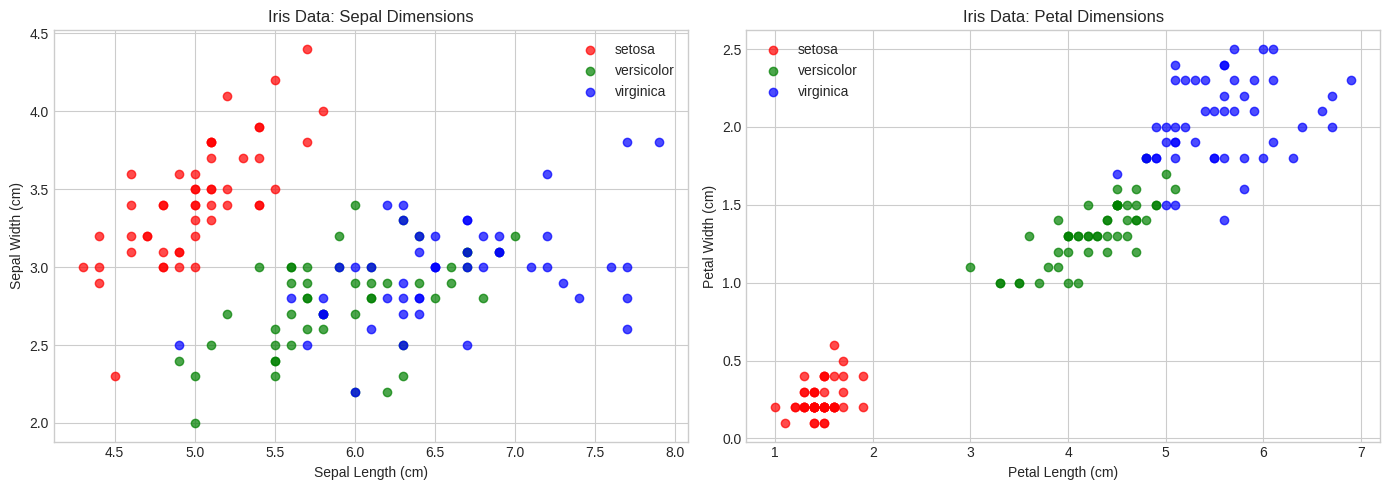

💡 Notice: Petal dimensions separate species much better than sepal!


In [ ]:
# Visualize: Can we see patterns?
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Two features
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = iris.target == i
    axes[0].scatter(iris.data[mask, 0], iris.data[mask, 1],
                    c=colors[i], label=species, alpha=0.7)
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend()
axes[0].set_title('Iris Data: Sepal Dimensions')

# Plot 2: Different features
for i, species in enumerate(iris.target_names):
    mask = iris.target == i
    axes[1].scatter(iris.data[mask, 2], iris.data[mask, 3],
                    c=colors[i], label=species, alpha=0.7)
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend()
axes[1].set_title('Iris Data: Petal Dimensions')

plt.tight_layout()
plt.show()

print("💡 Notice: Petal dimensions separate species much better than sepal!")

### Image Data

In [ ]:
# Load handwritten digits (MNIST-like)
digits = load_digits()

print("Shape of one image:", digits.images[0].shape)
print("That's 8x8 = 64 pixels per image")
print("Total images:", len(digits.images))

Shape of one image: (8, 8)
That's 8x8 = 64 pixels per image
Total images: 1797


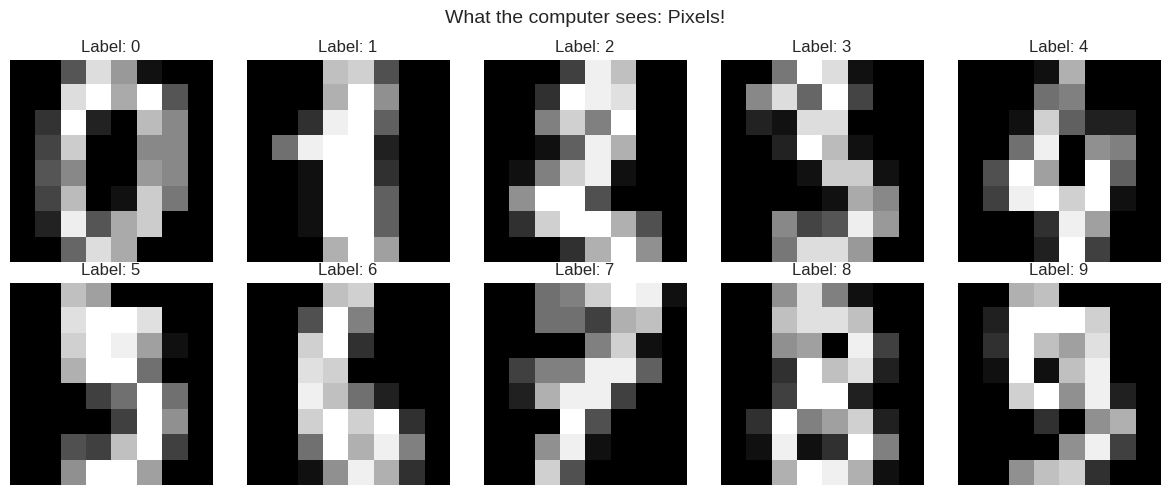

In [ ]:
# Let's see what the computer "sees"
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

plt.suptitle('What the computer sees: Pixels!', fontsize=14)
plt.tight_layout()
plt.show()

## Part 2: Features and Labels
---

Features (X): What we use to make predictions

Labels (y): What we want to predict

In [ ]:
# Iris dataset
X = iris.data   # Features: sepal length/width, petal length/width
y = iris.target  # Labels: species (0, 1, or 2)

print("Features shape:", X.shape)  # (150 flowers, 4 features)
print("Labels shape:", y.shape)     # (150 labels)
print("\nFirst flower:")
print(f"  Features: {X[0]}")
print(f"  Label: {y[0]} ({iris.target_names[y[0]]})")

Features shape: (150, 4)
Labels shape: (150,)

First flower:
  Features: [5.1 3.5 1.4 0.2]
  Label: 0 (setosa)


## Part 3: Train/Test Split - The Most Important Concept!

---
Why? We need to test on data the model has NEVER seen.

In [ ]:
# The magic function
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=56  # For reproducibility
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"\n💡 Rule of thumb: 80% train, 20% test")

Training set: 120 samples
Test set: 30 samples

💡 Rule of thumb: 80% train, 20% test


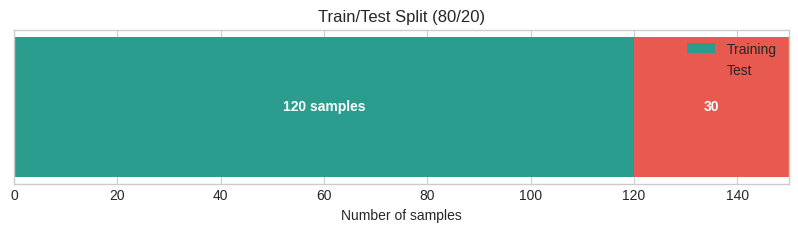

In [ ]:
# Visualize the split
fig, ax = plt.subplots(figsize=(10, 2))

train_bar = ax.barh([0], [len(X_train)], color='#2a9d8f', label='Training')
test_bar = ax.barh([0], [len(X_test)], left=[len(X_train)], color='#e85a4f', label='Test')

ax.set_xlim(0, 150)
ax.set_yticks([])
ax.set_xlabel('Number of samples')
ax.legend(loc='best')
ax.set_title('Train/Test Split (80/20)')

# Add labels
ax.text(len(X_train)/2, 0, f'{len(X_train)} samples', ha='center', va='center', color='white', fontweight='bold')
ax.text(len(X_train) + len(X_test)/2, 0, f'{len(X_test)}', ha='center', va='center', color='white', fontweight='bold')

plt.show()

## Part 4: The sklearn API Pattern
---
Every sklearn model follows the same pattern:

```python
from sklearn.some_module import SomeModel

model = SomeModel()        # 1. Create
model.fit(X_train, y_train) # 2. Train
predictions = model.predict(X_test)  # 3. Predict
```


In [ ]:
# Let's try it!
from sklearn.neighbors import KNeighborsClassifier

# 1. Create the model
model = KNeighborsClassifier(n_neighbors=3)

# 2. Train on training data
model.fit(X_train, y_train)

# 3. Predict on test data
predictions = model.predict(X_test)

print("Predictions:", predictions[:10])
print("Actual:     ", y_test[:10])

Predictions: [1 0 2 1 1 0 1 2 1 1]
Actual:      [1 0 2 1 1 0 1 2 1 1]


In [ ]:
# How good is it?
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"\n🎯 Accuracy: {accuracy:.1%}")
print(f"\nThat means {int(accuracy * len(y_test))}/{len(y_test)} correct predictions!")


🎯 Accuracy: 100.0%

That means 30/30 correct predictions!


## Exercises
---
Try these on your own!

```
# Exercise 1: Change the random_state (seed) and visualize its impact by
frequency count of classes in the test set for first 10 samples.
```

```
# Exercise 2: Change the test_size to 0.3 (30% test) and see how accuracy changes
```

```
# Exercise 3: Try different numbers of neighbors (n_neighbors=1, 5, 10)
# Which works best?
```

```
# Exercise 4:Perform classification on the MNIST-like digit dataset. HINT: You may have to flatten (reshape) the features.
```

```
# Exercise 5:Repeat the classification with your custom KNN implementation that you did in previous labs and compare:
(i) Accuracy and (ii) Time kaken for prediction.

```
Notebook of previous tutorial for reference for KNN:[link](https://colab.research.google.com/drive/1ilJRA-kHG0rilkCo8a89CtrS3Yf12jz9?usp=sharing)